In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.metrics import mean_squared_error

In [5]:
from sklearn import linear_model

In [6]:
from matplotlib import pyplot as plt

In [7]:
np.random.seed(42)

In [8]:
filePath = "/cxldata/datasets/project/bikes.csv"

In [9]:
bikesData = pd.read_csv(filePath)

In [10]:
type(bikesData.dteday)

pandas.core.series.Series

In [11]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
bikesData['yr'].unique()

array([0, 1])

In [13]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
columnsToDrop=['instant','casual','registered','atemp','dteday']

In [15]:
bikesData=bikesData.drop(columnsToDrop,axis=1)

In [16]:
np.random.seed(42)

In [17]:
from sklearn.model_selection import train_test_split

bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)

train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [29]:
columnsToScale=['temp','hum','windspeed']

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [35]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [48]:
train_set['temp'].mean()

1.6589552036519725e-15

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [75]:
trainingCols = train_set.drop('cnt',axis=1)

In [76]:
trainingLabels=train_set['cnt']

In [77]:
dec_reg = DecisionTreeRegressor(np.random.seed(42))

In [78]:
dec_reg = DecisionTreeRegressor()

# Perform cross-validation and compute negative MAE scores
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")

# Function to display scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Display the MAE scores
display_scores(dt_mae_scores)

Scores: [42.94494659 49.17912901 35.97206245 44.15365653 47.18077239 76.44407895
 57.19243421 47.65460526 51.91118421 96.50493421]
Mean: 54.91378038100593
Standard deviation: 17.235976527039966


In [80]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 68.75164598  77.89787997  55.2053982   73.8702865   74.08938837
 114.72476001  96.05004435  81.67842009  89.91412661 149.54903152]
Mean: 88.17309816096285
Standard deviation: 25.596518717701052


In [87]:
lin_reg=LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942319
Standard deviation: 31.42696570529541


In [99]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181862
Standard deviation: 37.55565075919544


In [103]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)

In [104]:
rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
Mean: 42.56938912059061
Standard deviation: 15.980256848600963


In [105]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
Mean: 67.23532294382946
Standard deviation: 25.544513111074128


In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [122]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")

In [123]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [124]:
print(grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}
[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


In [132]:
# Store the best estimator from Grid Search
final_model = grid_search.best_estimator_

# Sort the test_set by 'dayCount' (ascending order)
test_set.sort_values("dayCount", axis=0, inplace=True)

# Drop the 'cnt' column and store the remaining columns (features) in test_x_cols
test_x_cols = test_set.drop("cnt", axis=1).columns.values

# Save the target column name 'cnt' in test_y_cols
test_y_cols = "cnt"  # Since it's a single column, it remains a string

# Extract feature values into X_test
X_test = test_set.loc[:, test_x_cols]

# Extract target values into y_test
y_test = test_set.loc[:, test_y_cols]


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Final RMSE: 39.47930005837265


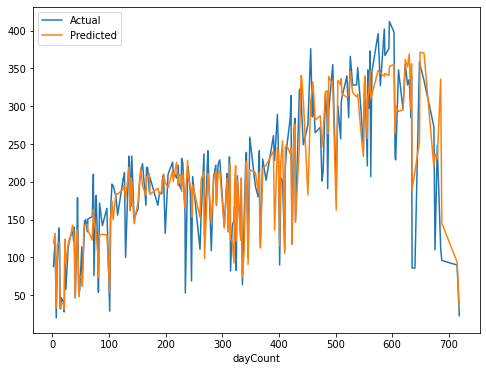

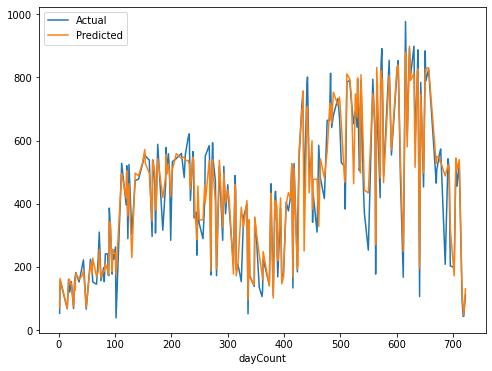

In [140]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Make predictions using final_model and store in 'predictedCounts_test' column
test_set.loc[:, "predictedCounts_test"] = final_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_set.loc[:, "predictedCounts_test"])

# Calculate Root Mean Squared Error (RMSE)
final_mse = np.sqrt(mse)

# Print RMSE
print("Final RMSE:", final_mse)

# Plot predicted values vs actual values
times = [9, 18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    
    # Filter test_set for specific hour
    test_set_freg_time = test_set[test_set.hr == time]
    
    # Plot actual counts
    test_set_freg_time.plot(kind="line", x="dayCount", y="cnt", ax=ax, label="Actual")
    
    # Plot predicted counts
    test_set_freg_time.plot(kind="line", x="dayCount", y="predictedCounts_test", ax=ax, label="Predicted")

    plt.show()